<a href="https://colab.research.google.com/github/emrecicekyurt/TensorFlowProjects/blob/main/Multi_ClassClassificationWithTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data is already splitted to test and train sets

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [32]:
#Showin the first training example

print(f"Training Sample :\n{train_data[0]}\n")
print(f"Training Label :\n{train_labels[0]}\n")

Training Sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [33]:
#checkin the shape of a single example 
train_data[0].shape, train_labels[0].shape

((28, 28), ())

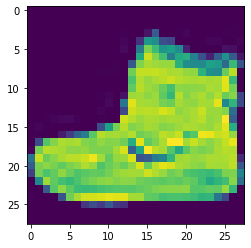

In [34]:
#plotting a single sample 

import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [35]:
#checkin out sample labels
train_labels[0]

#https://github.com/zalandoresearch/fashion-mnist
# 0 T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

# It seems like our sample belongs to the class 9 which is Ankle boot

9

In [36]:
# Creating a small list to index onto our training labels 

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

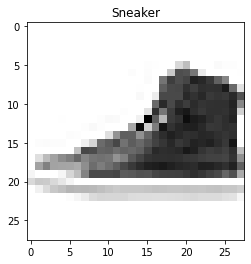

In [37]:
# Plott an example image and its label
index_of_choice = 2022
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

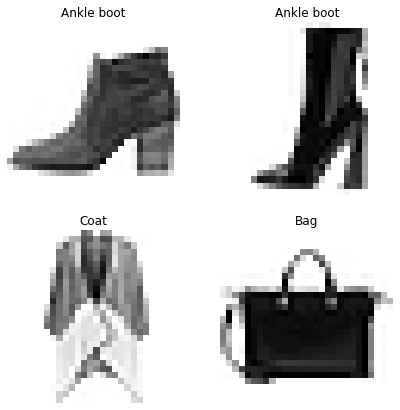

In [38]:
#plotting random multiple images of dataset
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Now We are going to build a **model** for the classification problem

Firstly we need to figure out what we will use to build it :

* Input Shape = 28x28 which is the shape of one image
* Output Shape = 10 that is one per class of clothing 
* Loss Function = tf.keras.losses.CategoricalCrossentropy() that is from Hands on Machine Learning Book (It would be BinaryCrossentropy() if it is a binary classification). CategoricalCrossentropy requires the data in the one hot encoded form, if we want to use the integer array, then it should be SparseCategoricalCrossentropy that we will use this version.
* Output Layer Activation = Softmax ( It is Sigmoid for binary classification)

In [39]:
#Set random seed
tf.random.set_seed(42)

#create the model
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4, activation= "relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ["accuracy"])

#fit the model
history = model.fit(train_data,
                    train_labels,
                    epochs = 10,
                    validation_data= (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [40]:
#check the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 4)                 3140      
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [41]:
#check min and max values of training data

train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled or normalized. So we should turn the data values between 0 and 1. 

In [42]:
# If we divide training and testing data by the maximum value, they will be converted to the numerical values between 0 and 1

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min max of scaled data
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [43]:
# Lets again build the model with normalized data

#Set random seed
tf.random.set_seed(42)

#create the model
model_2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4, activation= "relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ["accuracy"])

#fit the model
history_norm = model_2.fit(train_data_norm,
                    train_labels,
                    epochs = 10,
                    validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

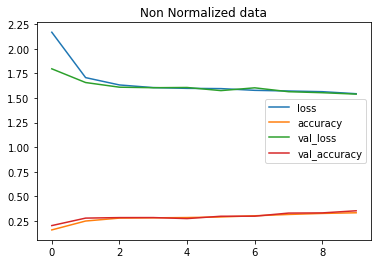

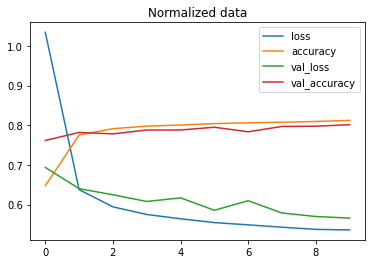

In [44]:
import pandas as pd

#Plot non normalized data loss curves
pd.DataFrame(history.history).plot(title = "Non Normalized data")
#Plot normalized data loss curves
pd.DataFrame(history_norm.history).plot(title = "Normalized data")

**Note:** Same model with *slightly* different data can produce *dramatically* different results. We might choose the same data with different architecture but we choose the different data and get a better result here !

**Now we will find the ideal learning rate**

In [45]:
#Set random seed
tf.random.set_seed(42)

#create the model
model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4, activation= "relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#compile the model
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ["accuracy"])

#create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#fit the model
find_lr_history = model_3.fit(train_data_norm,
                    train_labels,
                    epochs = 40,
                    validation_data= (test_data_norm, test_labels),
                    callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the optimum learning rate')

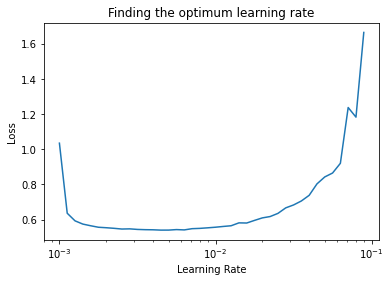

In [46]:
# plot learning rate curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3* (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the optimum learning rate")

In [48]:
10**-3 # To find the optimum learning rate we find the point where loss is least and go a bit back.
# It seems 0.001 is the optimum lr and its already the default lr of ADAM optimizer.


0.001

To find the optimum learning rate we find the point where loss is least and go a bit back.
It seems 0.001 is the optimum lr and its already the default lr of ADAM optimizer.

**There is no need to build another model because model_2 is already compiled with 0,001 learning rate with adam optimizer**

Now, Lets evaluate the model and make some predictions on it.

In [49]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [52]:
# Make predictions with the model_2 that is trained on normalized data
y_probs = model_2.predict(test_data_norm) 

# See first 5 predictions
y_probs[:5]

array([[2.67575240e-10, 8.36207697e-15, 4.81270290e-05, 3.40115491e-08,
        1.23736827e-04, 2.73353249e-01, 3.39613962e-07, 8.82699341e-02,
        6.16736943e-03, 6.32037222e-01],
       [8.12876970e-05, 5.76154818e-15, 9.49077964e-01, 7.81001347e-07,
        8.87467805e-03, 8.59926008e-13, 4.17942293e-02, 5.20495725e-26,
        1.70956584e-04, 7.83172140e-08],
       [1.09286455e-04, 9.96481419e-01, 9.71140857e-09, 3.40285408e-03,
        2.56672706e-06, 1.08077262e-20, 3.80360325e-06, 1.49554544e-18,
        3.59249377e-08, 2.74246805e-14],
       [1.03193539e-04, 9.93369401e-01, 5.70148302e-08, 6.49508741e-03,
        2.15692162e-05, 1.15561135e-17, 1.01945634e-05, 3.01000205e-14,
        5.62861715e-07, 8.60025853e-12],
       [1.39543653e-01, 3.78134882e-06, 3.45286101e-01, 1.36686331e-02,
        3.66058983e-02, 5.40098140e-11, 4.62722391e-01, 3.91256352e-19,
        2.16952222e-03, 8.28049593e-08]], dtype=float32)

In [54]:
class_names, y_probs[4], class_names[tf.argmax(y_probs[0])]

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 array([1.3954365e-01, 3.7813488e-06, 3.4528610e-01, 1.3668633e-02,
        3.6605898e-02, 5.4009814e-11, 4.6272239e-01, 3.9125635e-19,
        2.1695222e-03, 8.2804959e-08], dtype=float32),
 'Ankle boot')

In [56]:
# Converting all predictions probabilites into integers 
y_preds = y_probs.argmax(axis = 1)

# See first 5 prediction labels
y_preds[:5]

array([9, 2, 1, 1, 6])

Great! Now we have prediction labels in integer format. 
We get the maximum prediction probability obtaine from our model and convert them to integers.

**Lets make a confusion matrix now**

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred= y_preds)


array([[801,  11,  27,  81,   7,   1,  62,   0,  10,   0],
       [  2, 940,   2,  36,   7,   0,  13,   0,   0,   0],
       [ 34,   2, 662,  14, 166,   1, 108,   0,  13,   0],
       [ 67,  12,  12, 836,  33,   0,  28,   0,  12,   0],
       [  3,   1, 119,  44, 730,   0,  92,   0,   9,   2],
       [  0,   0,   0,   0,   0, 918,   0,  51,   7,  24],
       [205,   9, 171,  58, 141,   3, 397,   0,  16,   0],
       [  0,   0,   0,   0,   0,  44,   0, 921,   0,  35],
       [  3,   2,  34,  23,  10,  13,   7,   5, 901,   2],
       [  0,   0,   2,   0,   4,  37,   0,  47,   2, 908]])

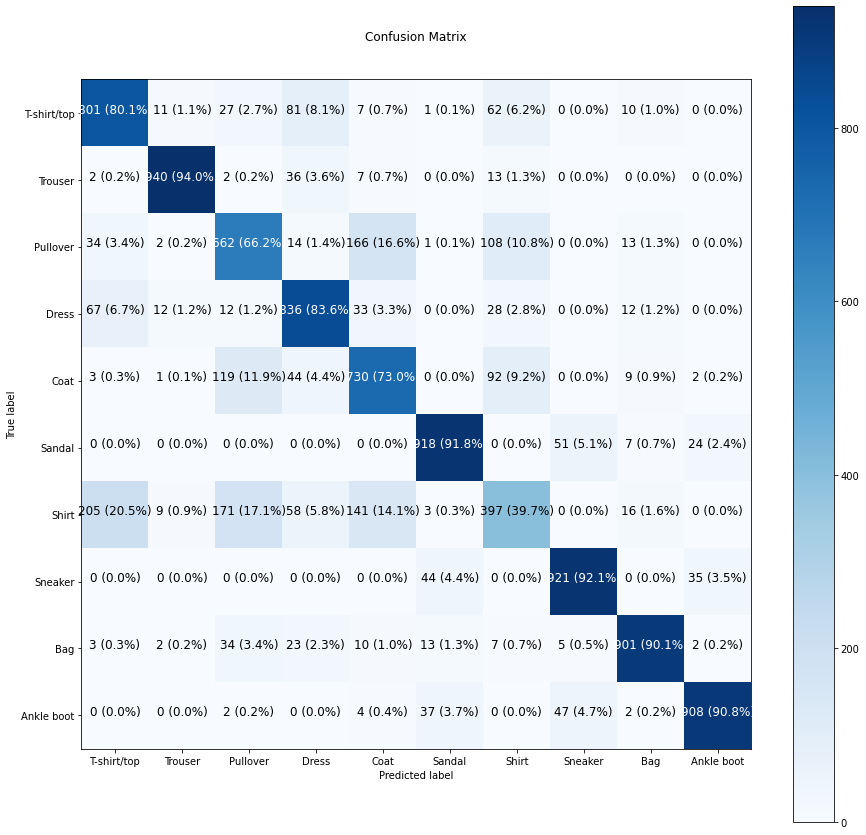

In [58]:
# Lets make a prettier version of confusion matrix to evaluate the model 
make_confusion_matrix(y_true=test_labels, 
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 12)

In [59]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

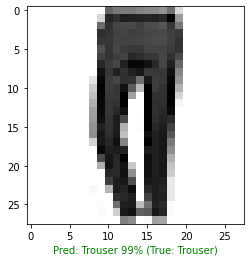

In [65]:
# Checking out a random image and its prediction
plot_random_image(model=model_2, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

In [66]:
# What was the layers that we used for our model?
model_2.layers

In [67]:
# Getting the pattern of a specific layer

weights, biases = model_2.layers[1].get_weights()

# Shapes 
weights, weights.shape #weights are initialized by randomly at the beginning with kernel initializer
#Later with Adam optimizer it heals itself

(array([[ 0.38585973, -0.01683232, -0.48614606, -0.5381741 ],
        [ 0.09176346, -0.07343104, -0.27991343,  0.0482569 ],
        [ 0.439081  ,  0.46483982, -0.6423495 , -0.44439033],
        ...,
        [-0.25405523,  0.5379417 , -0.1541084 ,  0.15027715],
        [-0.23082401,  0.45492047,  0.08331519, -0.3790486 ],
        [ 0.15038309,  0.13788234, -0.14806941, -0.0106601 ]],
       dtype=float32), (784, 4))

In [68]:
#checking the bias vector 
biases, biases.shape
#Biases are initialized as zeros at the beginning and for each unit in a layer we have per bias

(array([-0.07772563,  0.08738977, -0.36895958,  0.72360265], dtype=float32),
 (4,))

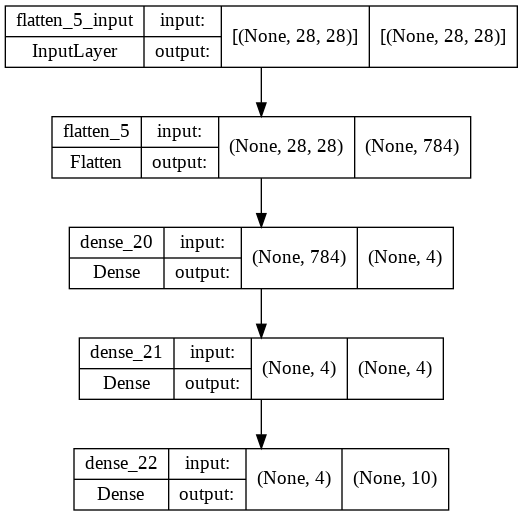

In [71]:
tf.keras.utils.plot_model(model_2, show_shapes= True) # Biases affects how much the weight will affect the next layer